In [1]:
from templateflow import api
import matplotlib.pyplot as plt
from cerebro import cerebro_brain_utils as cbu
from cerebro import cerebro_brain_viewer as cbv
import nibabel as nib
from brainvistools.surf import cerebro
from tvbase.parcellations import mmp as MMP

from matplotlib import colormaps

mni09b = api.get(
    template="MNI152NLin2009cAsym", suffix="T1w", desc="brain", resolution=1
)
mni09b

PosixPath('/Users/leonmartin_bih/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

In [2]:
mmp = nib.load(
    "/Users/leonmartin_bih/projects/TVBase/LesionNetworks/inputs/mmp1/tpl-MNI152NLin2009cAsym_prac-hcpmmp1_desc-ordered.nii.gz"
).get_fdata()

In [3]:
# # Define a viewer
# cerebro_viewer = cbv.Cerebro_brain_viewer(offscreen=True, background_color=(1,1,1,1))

# # Load an example volumetric file
# nii_file = cbu.get_data_file(mni09b)

# # Create a 3D surface of the mask
# volumetric_mask = cerebro_viewer.visualize_mask_surface(
#     nii_file,  # The volumetric file
#     6000,  # An arbitrary threshold to mask the data
#     color=(0.5, 0.4, 0.5, 1),  # Let's make the brain look pink!
#     gradient_direction="ascent",  # This defines the surface normal directions
#     smoothing=400  # Iteratively smooth the surface to look better
# )
# fig, ax = plt.subplots(figsize=(8,7))
# plt.subplots_adjust(wspace=0, hspace=0)
# ax.axis('off')
# cerebro_viewer.offscreen_draw_to_matplotlib_axes(ax)

# # Clear this viewer
# cerebro_viewer.viewer.window.destroy()
# plt.show()

In [4]:
import tvbase

ad_map = tvbase.map_scaiview("MESH:D056344")
data = ad_map.parc_data
# data[10:360] = 0

In [5]:
import numpy as np
from matplotlib.colors import ListedColormap
import nibabel as nib

mmp_file = "/Users/leonmartin_bih/work_data/software/Cerebro_Viewer/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors_with_Atlas_ROIs2.32k_fs_LR.dlabel.nii"

roi_info = np.loadtxt(
    "/Users/leonmartin_bih/projects/TVBase/LesionNetworks/inputs/mmp1/hcpmmp1_ordered.txt",
    dtype=str,
)
rois = roi_info[:, 1]

mmp_cmap = ListedColormap(roi_info[:, 2:].astype(float) / 255)

mmp = nib.load(mmp_file)
mmp_data = mmp.get_fdata().astype("int32")

data0 = np.insert(data, 0, 0)

data = data0[mmp_data].squeeze()

In [6]:
fig = cerebro.plot_greyordinates(data, view="R", alpha=1, plot_sctx='none')
# cmap='viridis'
# norm = plt.Normalize(min(data), max(data))
# cmap = plt.get_cmap(cmap)

# sm = ScalarMappable(norm=norm, cmap=cmap)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=fig.axes[0], shrink=.5)
# cbar.set_label('Data Value', rotation=270, labelpad=15)


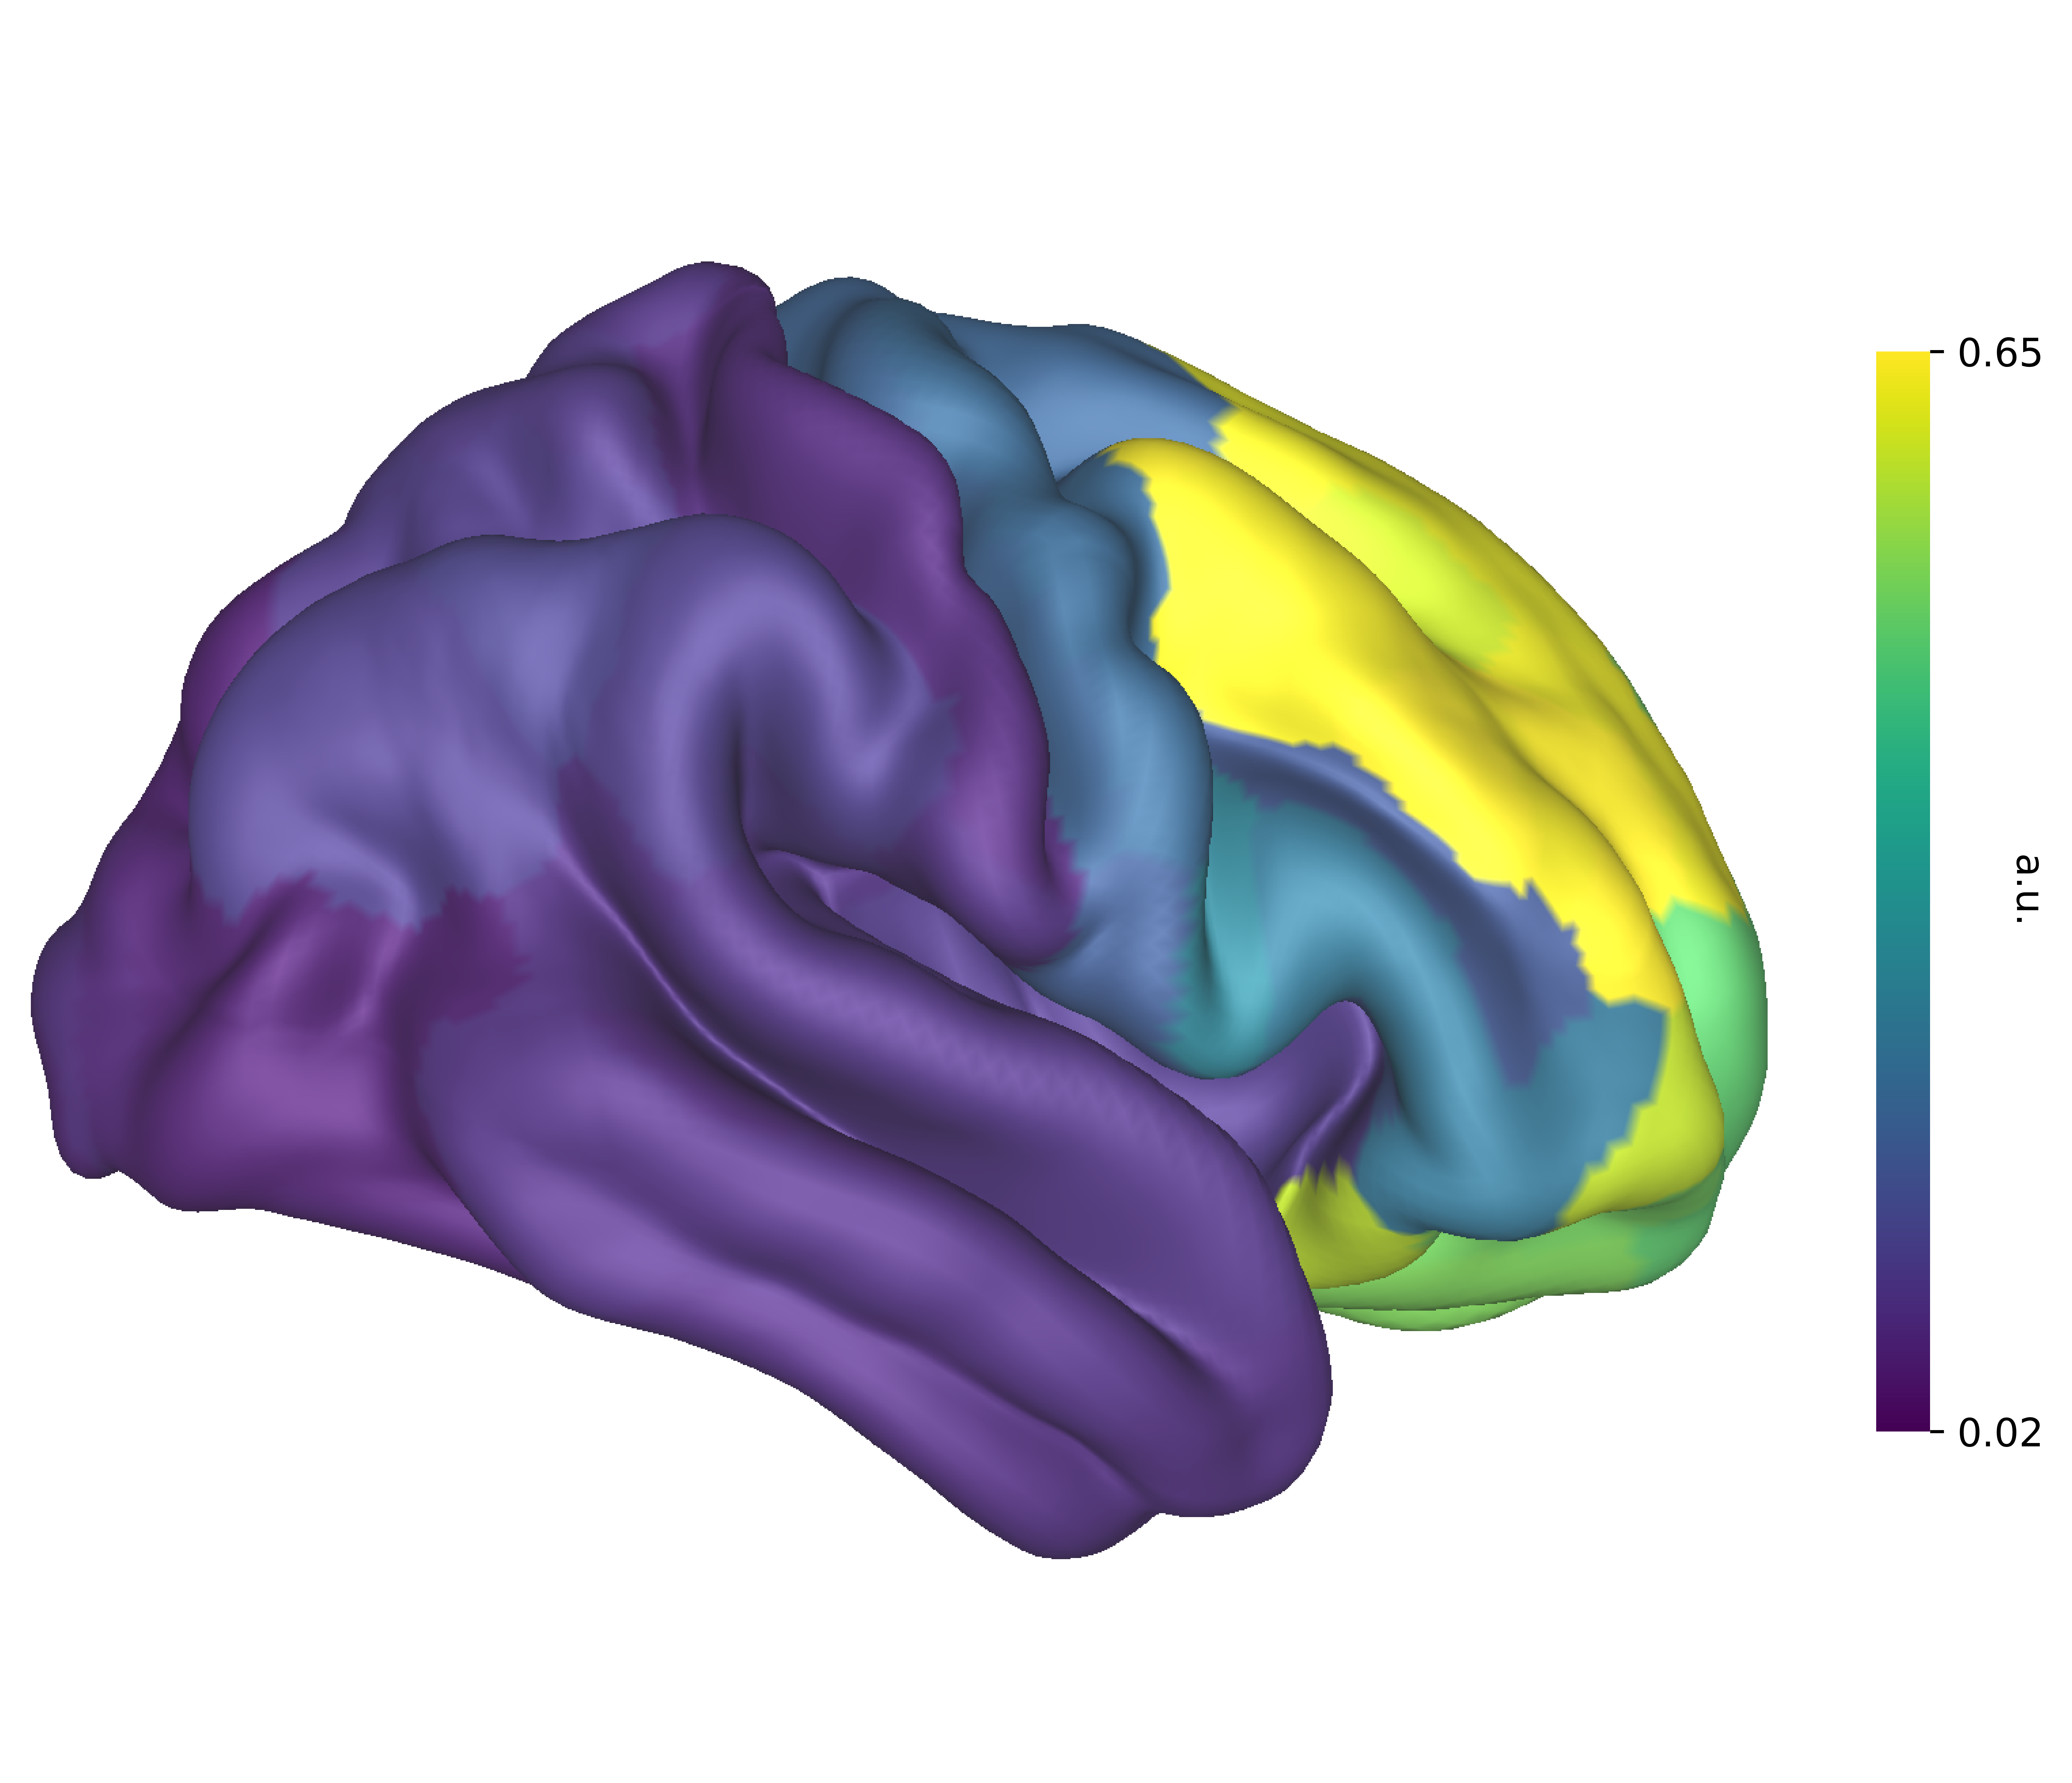

In [7]:
fig.set_dpi(1000)
fig

In [8]:
np.unique(MMP.get_ctx_data(hemi="left"))

array([181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191.,
       192., 193., 194., 195., 196., 197., 198., 199., 200., 201., 202.,
       203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213.,
       214., 215., 216., 217., 218., 219., 220., 221., 222., 223., 224.,
       225., 226., 227., 228., 229., 230., 231., 232., 233., 234., 235.,
       236., 237., 238., 239., 240., 241., 242., 243., 244., 245., 246.,
       247., 248., 249., 250., 251., 252., 253., 254., 255., 256., 257.,
       258., 259., 260., 261., 262., 263., 264., 265., 266., 267., 268.,
       269., 270., 271., 272., 273., 274., 275., 276., 277., 278., 279.,
       280., 281., 282., 283., 284., 285., 286., 287., 288., 289., 290.,
       291., 292., 293., 294., 295., 296., 297., 298., 299., 300., 301.,
       302., 303., 304., 305., 306., 307., 308., 309., 310., 311., 312.,
       313., 314., 315., 316., 317., 318., 319., 320., 321., 322., 323.,
       324., 325., 326., 327., 328., 329., 330., 33

(91282,)


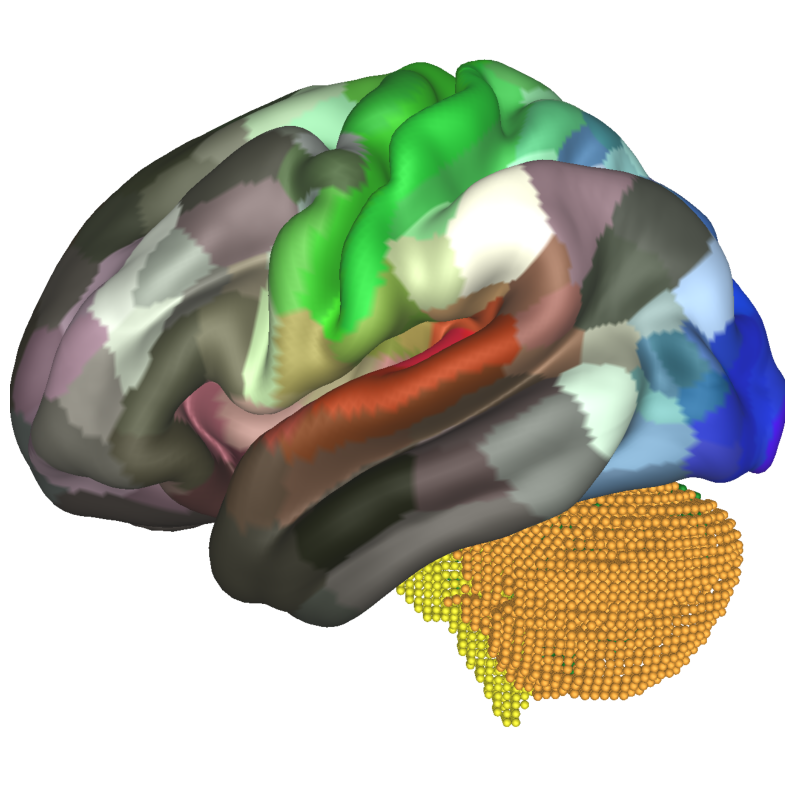

In [9]:
from brainvistools.constants import DATA_DIR
from brainvistools.surf import cerebro
from os.path import join
import numpy as np
from matplotlib.colors import ListedColormap
from tvbase.parcellations import mmp as MMP

mmp_file = join(
    DATA_DIR,
    "parcellation",
    "Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors_with_Atlas_ROIs2.32k_fs_LR.dlabel.nii",
)
roi_info = np.loadtxt(join(DATA_DIR, "parcellation", "hcpmmp1_ordered.txt"), dtype=str)
mmp_cmap = ListedColormap(roi_info[:, 2:].astype(float) / 255)

data = np.zeros(91282)
mmp_lh = MMP.get_ctx_data(hemi="left").squeeze()
mmp_rh = MMP.get_ctx_data(hemi="right").squeeze()
mmp_sctx = MMP.get_sctx_data().squeeze()

data[: len(mmp_lh)] = mmp_lh
data[len(mmp_lh) : len(mmp_lh) + len(mmp_rh)] = mmp_rh
data[len(mmp_lh) + len(mmp_rh) : len(mmp_lh) + len(mmp_rh) + len(mmp_sctx)] = mmp_sctx
print(data.shape)
cerebro.plot_greyordinates(data=data, cmap=mmp_cmap, colorbar=False)

In [10]:
lh.darrays[0].data.shape

NameError: name 'lh' is not defined

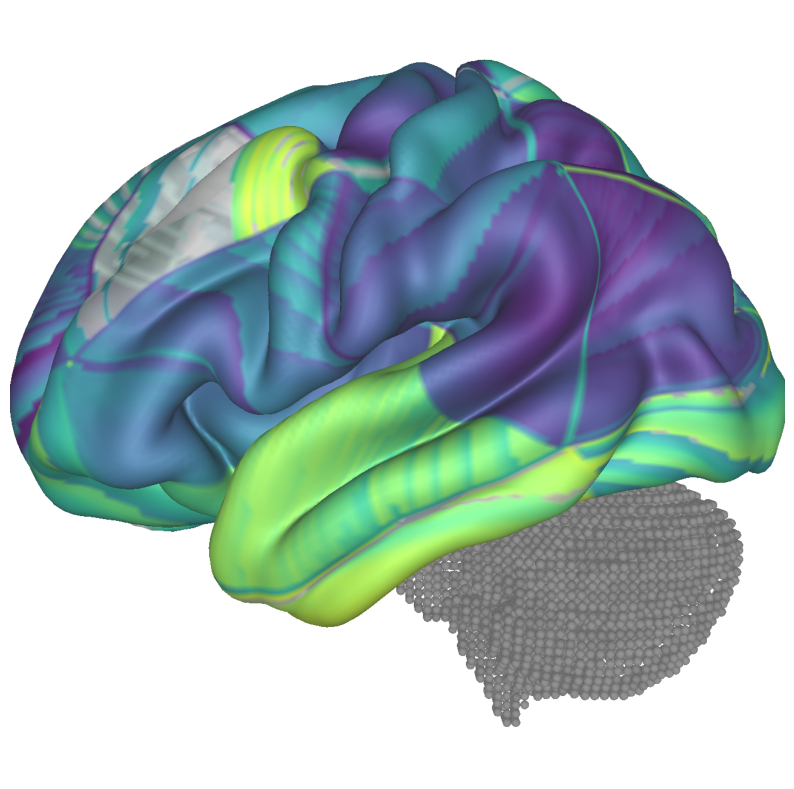

In [ ]:
from tvbase.parcellations import mmp
from neuromaps import datasets, transforms
from tvbase.parcellations import mmp
from tvbase.utils import parcellate, array2nifti
from tvbase.plot import double_cmap
from tvbase.parcellations.mmp import get_ctx_data, get_sctx_data

import pandas as pd

lh, rh = transforms.fslr_to_fslr(
    datasets.fetch_annotation(source="hcps1200", desc="megdelta"), target_density="32k"
)

data = np.zeros(91282)
lh_data = lh.darrays[0].data[: len(mmp_lh)]
rh_data = rh.darrays[0].data[: len(mmp_rh)]

data = np.zeros(91282)
mmp_lh = MMP.get_ctx_data(hemi="left").squeeze()
mmp_rh = MMP.get_ctx_data(hemi="right").squeeze()
mmp_sctx = MMP.get_sctx_data().squeeze()

data[: len(mmp_lh)] = lh_data
data[len(mmp_lh) : len(mmp_lh) + len(mmp_rh)] = rh_data
data[len(mmp_lh) + len(mmp_rh) : len(mmp_lh) + len(mmp_rh) + len(mmp_sctx)] = np.zeros(mmp_sctx.shape)

cerebro.plot_greyordinates(data=data, colorbar=False)

In [ ]:
dparc = mmp.parcellate_lr_gifti(lh, rh)

In [ ]:
data

array([0.30131012, 0.26140916, 0.30865219, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
cerebro.plot_mmp

<function brainvistools.surf.cerebro.plot_mmp()>

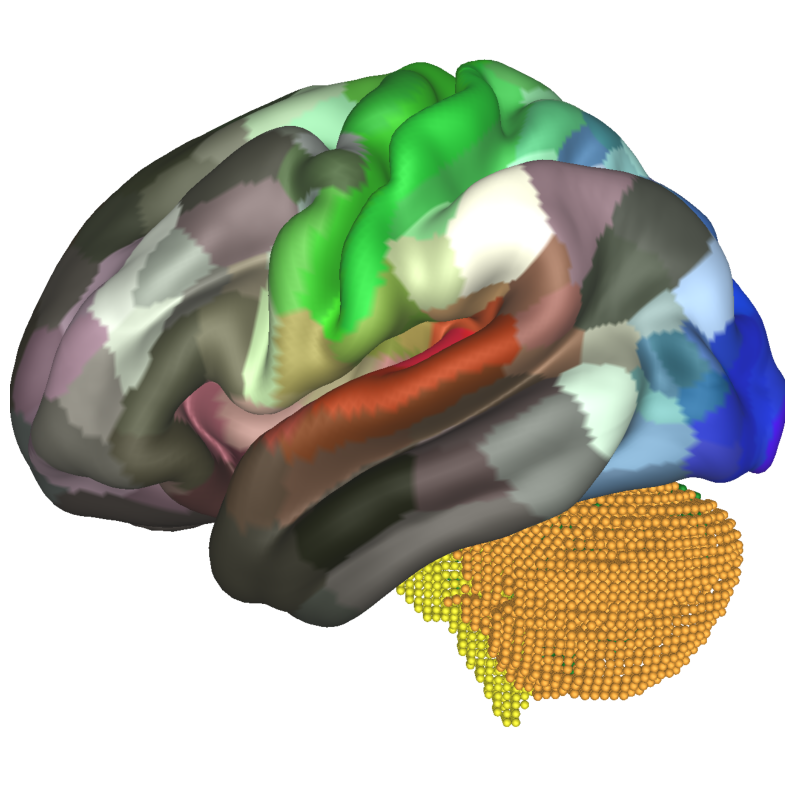

In [ ]:
cerebro.plot_mmp()